In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.algorithms import duplicated
from pygments.util import duplicates_removed

In [12]:
#Load the dataset

df = pd.read_csv("../dataset/raw/car_pricee.csv")
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Shape of dataset: (10277, 17)
   Unnamed: 0 Brand Model     YOM  Engine (cc)       Gear Fuel Type  \
0         0.0  AUDI    A1  2016.0        990.0  Automatic    Petrol   
1         1.0  AUDI    A1  2017.0       1000.0  Automatic    Petrol   
2         2.0  AUDI    A1  2018.0       1000.0  Automatic    Petrol   
3         3.0  AUDI    A1  2017.0       1000.0  Automatic    Petrol   
4         4.0  AUDI    A1  2017.0       1000.0  Automatic    Petrol   

   Millage(KM)                    Town        Date     Leasing Condition  \
0      99000.0                 Gampaha  2025-02-05  No Leasing      USED   
1      88000.0                 Colombo  2025-01-14  No Leasing      USED   
2      77000.0  Dehiwala-Mount-Lavinia  2025-01-23  No Leasing      USED   
3      88000.0                 Negombo  2024-12-21  No Leasing      USED   
4      88000.0                 Colombo  2024-12-21  No Leasing      USED   

  AIR CONDITION POWER STEERING POWER MIRROR POWER WINDOW  Price  
0     Available     

In [13]:
#Handle missing values

print("\nMissing values per column:\n", df.isnull().sum())




Missing values per column:
 Unnamed: 0        121
Brand             127
Model             130
YOM               118
Engine (cc)       123
Gear              147
Fuel Type         122
Millage(KM)       128
Town              122
Date              114
Leasing           109
Condition         123
AIR CONDITION     124
POWER STEERING    112
POWER MIRROR      117
POWER WINDOW      134
Price             106
dtype: int64


In [14]:
df = df.dropna(subset=["Price"])

In [15]:
num_cols = df.select_dtypes(include="number").columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

In [16]:
cat_cols = df.select_dtypes(exclude="number").columns.tolist()
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [17]:
#Remove duplicates

before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows")


Removed 484 duplicate rows


In [18]:
#Handle outliers

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 * IQR)]
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (9309, 17)


In [19]:
# Exploratory Data Analysis(EDA)

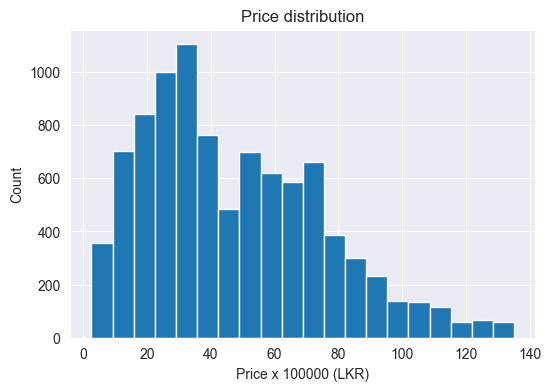

In [20]:
#Histogram of Price

plt.figure(figsize=(6, 4))
df['Price'].hist(bins=20)
plt.title('Price distribution')
plt.xlabel('Price x 100000 (LKR)')
plt.ylabel('Count')
plt.show()

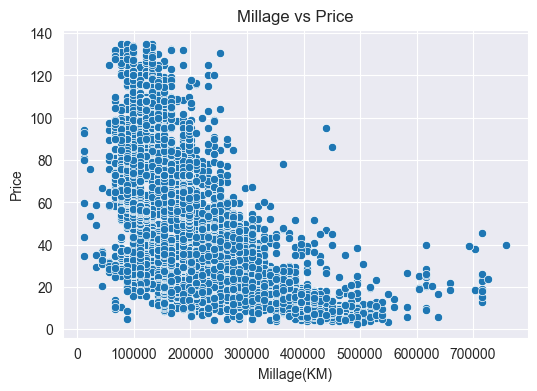

In [21]:
#Scatter: Price vs Mileage

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Millage(KM)', y='Price', data=df)
plt.title('Millage vs Price')
plt.show()

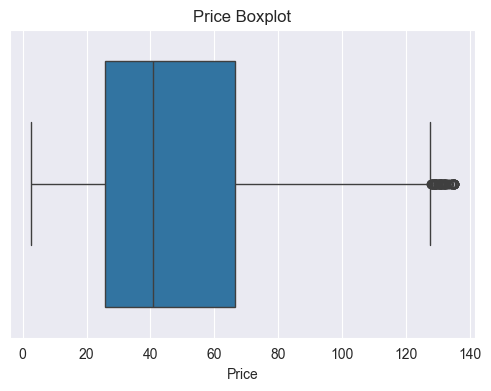

In [22]:
#Boxplot for price

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')
plt.show()

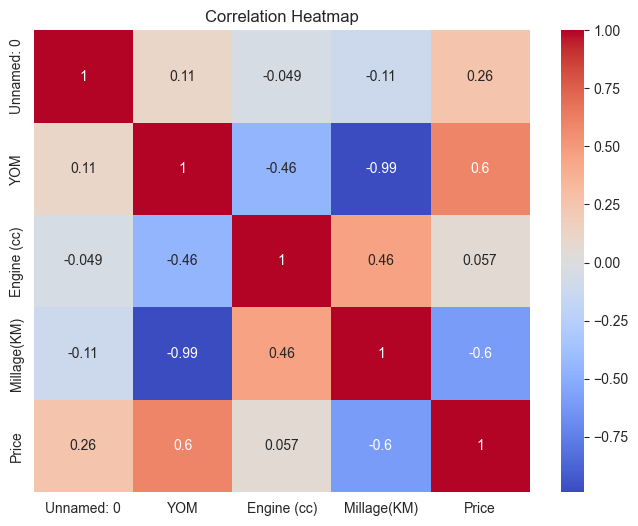

In [23]:
#Correlation heatmap (numerical)

plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['int64' , 'float64']).corr() , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df = df.drop(df.columns[0],axis=1)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9309 entries, 0 to 9787
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           9309 non-null   object 
 1   Model           9309 non-null   object 
 2   YOM             9309 non-null   float64
 3   Engine (cc)     9309 non-null   float64
 4   Gear            9309 non-null   object 
 5   Fuel Type       9309 non-null   object 
 6   Millage(KM)     9309 non-null   float64
 7   Town            9309 non-null   object 
 8   Date            9309 non-null   object 
 9   Leasing         9309 non-null   object 
 10  Condition       9309 non-null   object 
 11  AIR CONDITION   9309 non-null   object 
 12  POWER STEERING  9309 non-null   object 
 13  POWER MIRROR    9309 non-null   object 
 14  POWER WINDOW    9309 non-null   object 
 15  Price           9309 non-null   float64
dtypes: float64(4), object(12)
memory usage: 1.2+ MB


In [26]:


df.to_csv("../dataset/processed/cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_car_price_dataset.csv'")



Cleaned dataset saved as 'cleaned_car_price_dataset.csv'
